# Seaborn Tutorial

The Seaborn library is an excellent resource for data visualization. Directly complementing matplotlib, Seaborn allows for enhanced informational graphics through a high-level interface. This library can be a helpful tool to visualize data before processing it as well as to professionally display data after it has been analyzed.

The library can be used with numpy and pandas data structures, focusing on the latter during this tutorial. Seaborn also offers integration with statistical packages such as scipy.

This tutorial will touch upon many features of Seaborn including representation of univariate and bivariate distributions and categorical data. It will also highlight ways to determine and display the relationships between data, focusing on linear regression. Then, it will cover the representation of data through a heatmap.

Lastly, color is an integral part of visualization. We will see the ways to incorporate built-in and customized color schemes into our data representation.

We start by importing the pandas and seaborn libraries (commonly imported as 'pd' and 'sns'), and pyplot from the matplotlib library (as 'plt').

In [500]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

With any given dataset, before processing the data, it is helpful to view the distribution of the variables. This tutorial will detail the ways to handle univariate and bivariate distributions.

## Visualization of Distributions

### Univariate Distributions

We first start with representing univariate data, which describes one variable and patterns in the data for that variable.

Our first dataset ProfessionScore is one of participants (consisting of students and professors) in a study who were first instructed to take a pre-test. Then, the students and professors listened to a lecture after which they had to take a post-test. The investigators wanted to compare whether the lecture lead to improved scores on the test. Below are the results of the study.

The first step of any visualization is to load the data. Let's see how to read the csv file into a pandas dataframe.

In [501]:
#load the data
ProfessionScoreData = pd.read_csv('ProfessionScore.csv')
ProfessionScoreData.head()

,Name,Age,Gender,Race,Profession,Pre-Test,Post-Test,Hours of Sleep,Annual Income (in thousands of dollars)
0,Alice,20,F,White,Student,43,78,4.2,18
1,Bob,23,M,White,Student,54,88,6.5,25
2,Caterina,31,F,Hispanic,Professor,64,89,7.2,90
3,Donald,21,M,White,Student,23,99,9.8,19
4,Ella,18,F,White,Student,54,76,5.6,4


Now, we want to first visualize the pre-test and post-test results. Using the seaborn distplot() function, we can plot a histogram representing the data columns of 'Pre-Test' and 'Post-Test'. 

We can also plot a kernel density estimate (by setting kde = True) which estimates the probability density function of a random variable. This is shown by the curved lines fitting the general histogram shape. Additionally, we can specify a 'bins' parameter which indicates the number of intervals into which the data is divided. The distplot() function also takes in a color parameter and a label parameter, important when displaying a legend in the plot.

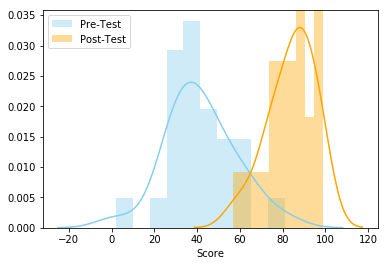

In [502]:
#Comparing participants' pre-test and post-test results
#use distplot() function to plot histogram and kernel density function
sns.distplot(ProfessionScoreData['Pre-Test'], kde = True, bins = 10, color = "skyblue", label = "Pre-Test")
sns.distplot(ProfessionScoreData['Post-Test'], kde = True, bins = 10, color = "orange", label = "Post-Test")

#reset xlabel to 'Score'
plt.xlabel('Score')

#display legend
plt.legend()

#plt.show() is used to actually display the figure
plt.show()

What if we just wanted to see the data of the students (and not the professors)?

In [503]:
print(data.loc[ProfessionScoreData['Profession']=='Student'])

       Name  Hours of Sleep  Score
0     Alice             4.2     78
1       Bob             6.5     88
3    Donald             9.8     99
4      Ella             7.3     76
6    George             5.5     83
7     Haley             3.6     82
9    Jackie             2.1     69
13     Nova             4.4     75
14      Ovi             5.6     74
15    Piper             7.0     88
19    Tammy             4.5     57
21  Vanessa             6.2     63
23   Xavier             5.6     73


Let's extract the data for all the students and save it in another dataframe:

In [504]:
#Storing data for students in a separate dataframe
Studentdata = pd.DataFrame(ProfessionScoreData.loc[ProfessionScoreData['Profession']=='Student'])
Studentdata.head()

,Name,Age,Gender,Race,Profession,Pre-Test,Post-Test,Hours of Sleep,Annual Income (in thousands of dollars)
0,Alice,20,F,White,Student,43,78,4.2,18
1,Bob,23,M,White,Student,54,88,6.5,25
3,Donald,21,M,White,Student,23,99,9.8,19
4,Ella,18,F,White,Student,54,76,5.6,4
6,George,18,M,Af. American,Student,81,83,5.5,6


And let's do the same for the data for the professors:

In [505]:
#Storing data for professors in a separate dataframe
Professordata = pd.DataFrame(ProfessionScoreData.loc[ProfessionScoreData['Profession']=='Professor'])
Professordata.head()

,Name,Age,Gender,Race,Profession,Pre-Test,Post-Test,Hours of Sleep,Annual Income (in thousands of dollars)
2,Caterina,31,F,Hispanic,Professor,64,89,7.2,90
5,Finn,40,M,White,Professor,65,95,8.4,129
8,Ima,59,F,White,Professor,65,98,5.3,209
10,Kalsey,65,F,White,Professor,34,99,7.0,260
11,Leon,33,M,White,Professor,54,86,6.3,132


Now, we are able to overlay the performance of students and professors on the post-test!

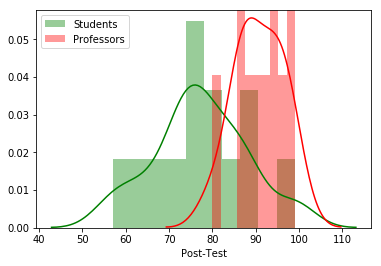

In [506]:
#Comparing student and professor post-test results
sns.distplot(Studentdata['Post-Test'], kde = True, bins = 10, color = "green", label = "Students")
sns.distplot(Professordata['Post-Test'], kde = True, bins = 10, color = "red", label = "Professors")
plt.legend()
plt.show()

### Bivariate Distributions

Here, we move onto bivariate distributions which have two variables and describe any relationships that exist between them.

To visualize the relationship between two variables, we often use a scatterplot. This plot depicts the two variables on the two axes, and the points construct a 2-dimensional representation of their relationship.

The jointplot() function plots a scatterplot by default:

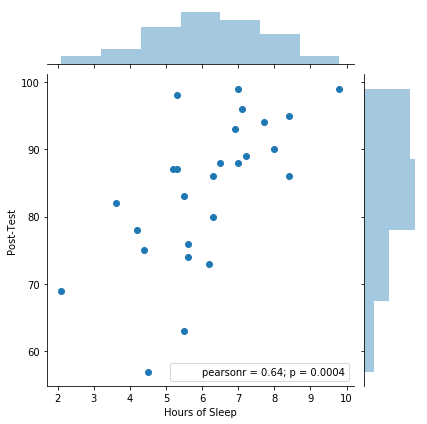

In [507]:
#construct scatterplot
sns.jointplot(x='Hours of Sleep', y='Post-Test', data = ProfessionScoreData)
plt.show()

If we wanted to visualize the bivariate data similar to the univariate histogram, we can use a "hexbin" plot which created hexagonal bins to represent the data. Nevertheless, this plot is better suited for larger data sets.

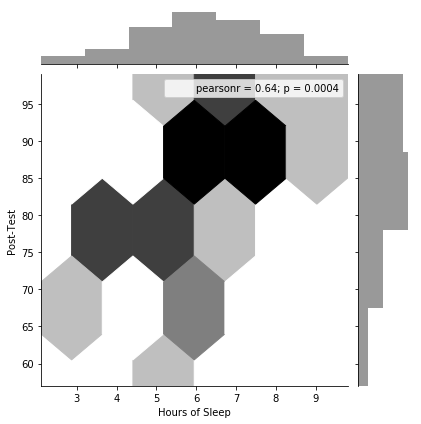

In [508]:
#generating hexbin plots
sns.jointplot(x='Hours of Sleep', y='Post-Test', data = ProfessionScoreData, kind="hex", color = "k")
plt.show()

We can also generate a figure displaying the kernel density estimation for bivariate data.

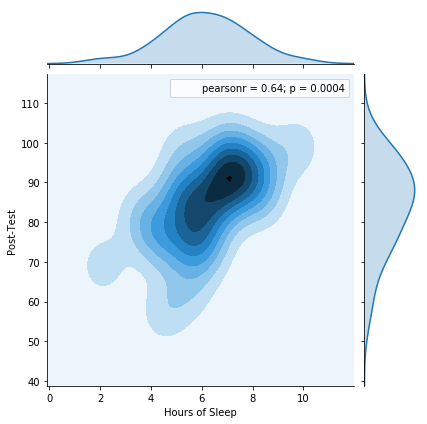

In [509]:
#generating a Kernel Density Estimation plot
sns.jointplot(x='Hours of Sleep', y='Post-Test', data = ProfessionScoreData, kind="kde")
plt.show()

Now, let us see how we can visualize pairwise relationships.

PairGrid facilitates the construction of a grid with scatterplots showing the relationship between all different numerical data in a dataset.

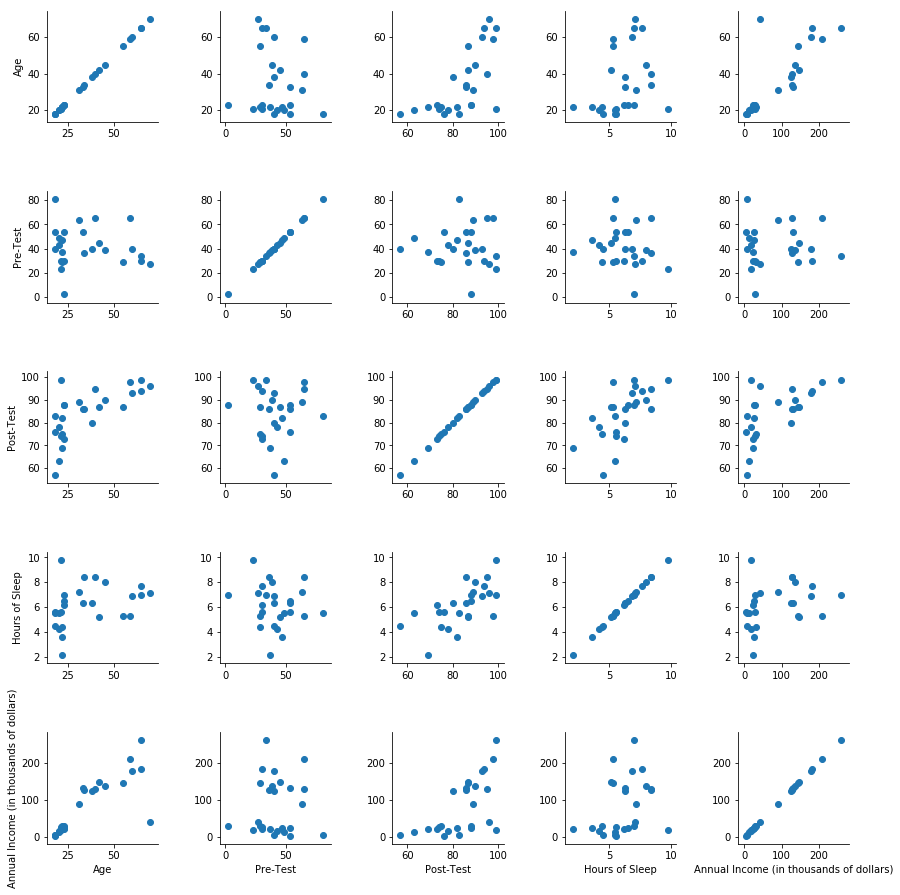

In [510]:
#plot pairwise relationships between all numerical data in ProfessionScoreData
g = sns.PairGrid(ProfessionScoreData)
g = g.map(plt.scatter)
plt.show()

On the diagonal, we can choose to the the histogram of each particular variable to get an idea of each variable's univariate distribution.

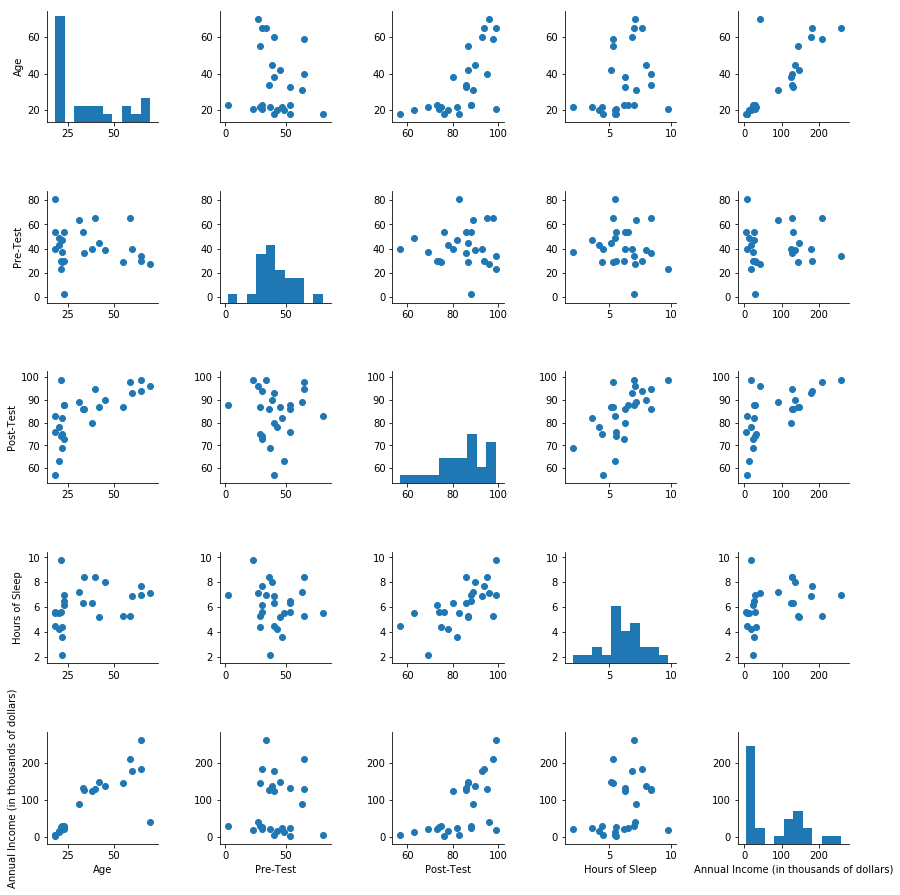

In [511]:
#plot pairwise comparisons while including histograms on the diagonal and scatter plots on the off-diagonal
g = sns.PairGrid(ProfessionScoreData)

#histograms on diagonal
g = g.map_diag(plt.hist)

#scatterplot on off-diagonals
g = g.map_offdiag(plt.scatter)
plt.show()

In the event that we want to view the the pairwise plots while also analyzing a categorical variable, we can make use of color through the 'hue' parameter in PairGrid.

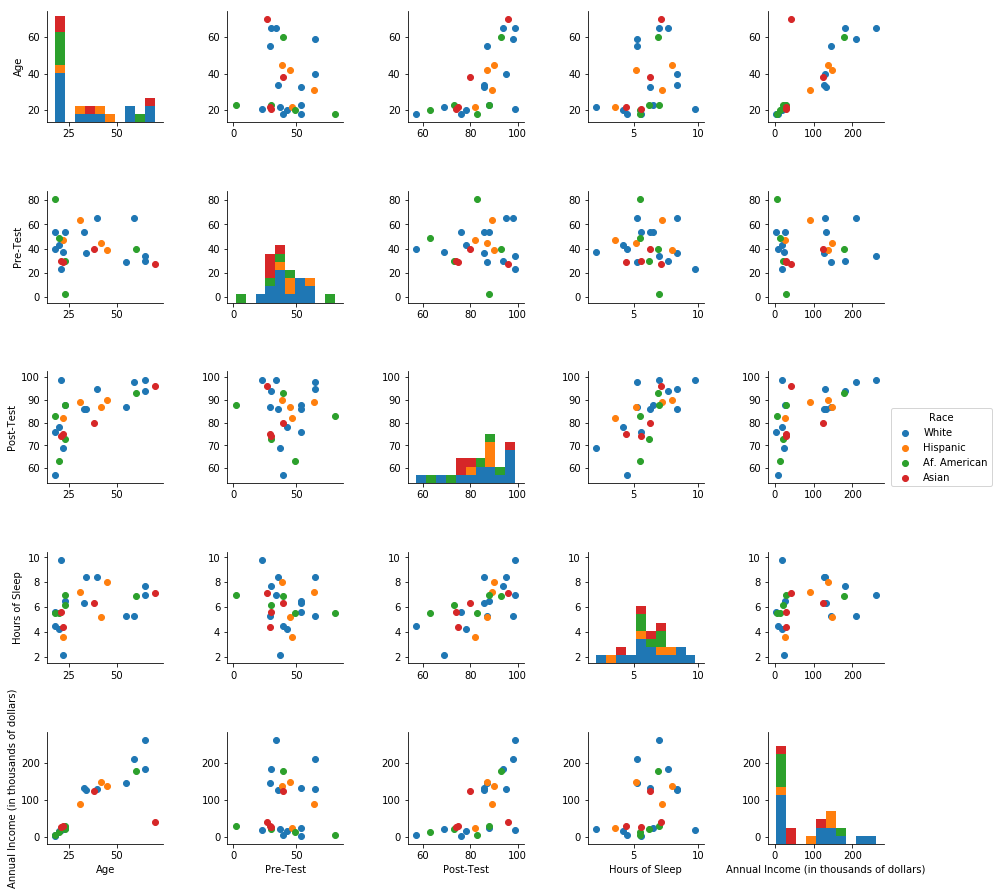

In [512]:
#pairwise plot with a specified 'hue' parameter
#we have set hue='Race'
#various colors are representing the different values taken on by the Race variable

g = sns.PairGrid(ProfessionScoreData, hue="Race")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()
plt.show()

Now that we have spent some time looking at numerical data, let's take a look at ways to represent categorical data (data divided into categories).

## Categorical Data

Suppose we want a count of the participants based on their race. To achieve that, we can use the countplot() function which provides a count of participants of each race.

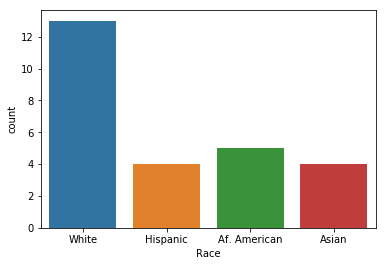

In [513]:
sns.countplot(x="Race", data=ProfessionScoreData)
plt.show()

As we move on to futher displays of categorical data, let's discover another dataset, DayTemperature. This dataset is composed of several instances on which the temperature has been recorded with the corresponding month. The data was collected to analyze the general trends in the temperature over the twelve months.

Let's begin by loading the dataset into a pandas dataframe:

In [514]:
DayTemperatureData = pd.read_csv('DayTemperature.csv')
DayTemperatureData.head()

,Month,Temperature
0,Jan,31
1,Mar,45
2,Sep,55
3,Nov,59
4,Dec,22


The stripplot() function allows an easy visualization of the categorical data as a scatterplot. It takes parameters of the x and y variables, the data, the size, as well as order (which determines the order in which the categories are printed on the x axis).

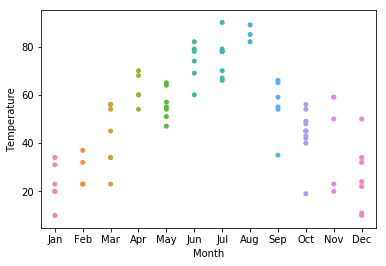

In [515]:
#stripplot() function implemented to show categorical scatterplot
DayTempStripPlot = sns.stripplot(x="Month", y="Temperature", data=DayTemperatureData, size = 5, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

If you notice above, all the points for each month are vertically positioned in a line. What if you have multiple data points in a month that corresponded to the similar temperature values? The points would overlap, and you may miss to capture the frequent appearance of the particular temperature values. To avoid such a misinterpretation, the stripplot() function takes in another parameter - 'jitter' which, when True, scatters the overlapping points to ensure the overlapping points are seen clearly.

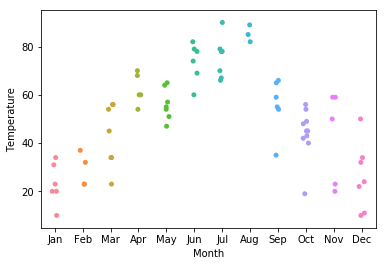

In [516]:
#stripplot() with jitter = True
DayTempStripPlot = sns.stripplot(x="Month", y="Temperature", data=DayTemperatureData, size = 5, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], jitter = True)
plt.show()

Below is another way to represent categorical data. The boxplot() function below generates a box-and-whisker plot. The extreme ends of the box represents the quartiles and the line within the boxplot represents the mean. The whiskers extend to the range of the data (unless there are outliers in which case they are represented by a diamond).

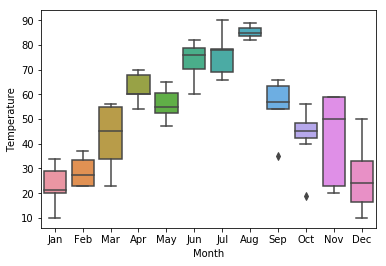

In [517]:
#boxplot()
sns.boxplot(x = "Month", y="Temperature", data = DayTemperatureData, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In a violin plot, we see an extention of the boxplot which incorporated the kernel density estimate for each of the categories.

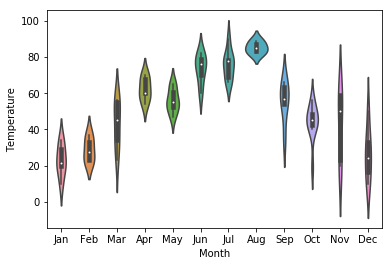

In [518]:
#violinplot()
sns.violinplot(x = "Month", y="Temperature", data = DayTemperatureData, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Now, let's take a look at the next dataset, BusinessSalesByQuarters. This data is of the sales (in thousands of dollars) of four different shops over five years, recorded by quarter.

First, we load the data:

In [519]:
#load the data
BusinessSalesData = pd.read_csv('BusinessSalesByQuarters.csv')
BusinessSalesData.head()

,Shop Type,Quarter,Sales (in thousands of dollars)
0,Scuba,Q1,20
1,Scuba,Q1,34
2,Scuba,Q1,28
3,Scuba,Q1,30
4,Scuba,Q1,32


We have seen ways to see the distribution of the data. The next plot will show how we can capture the central tendencies in a dataset and use them as a basis of statistical estimation. The barplot() function constructs bars based on the mean, while including a black line (error bar) which signifies the confidence interval.

In the barplot below, we are able to compare the sales over the different shop types. Additionally, the barplot() function has a parameter 'hue' set to "Quarter" to allow us to visualize the sales as they vary by quarter for each of the shop types.

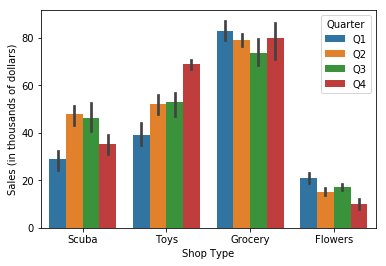

In [520]:
sns.barplot(x="Shop Type", y="Sales (in thousands of dollars)", hue="Quarter", data=BusinessSalesData)
plt.show()

Next, we move to analyzing relationships between variables. In Visualization of Distributions, we learned to view distributions of bivariate data. Here, we will learn to employ statistics to describe the relationships and generate regression plots in Seaborn.

## Linear Relationships

Returning back to our first dataset, ProfessionScoreData, we were given the age and annual income of the participants in our study. The investigators now want to determine if there is any linear relationship between those two variables. 

In Seaborn, the regplot() and lmplot() functions are used to plot regression models. Both functions generate a plot which incorporates a scatterplot of all of the data, a regression line, and a 95% confidence interval which is shaded on both sides of the line.

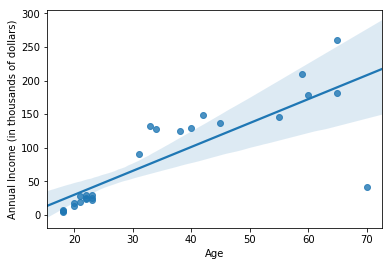

In [521]:
#regplot function plotting a regression between age and annual income of participants
sns.regplot(x='Age', y='Annual Income (in thousands of dollars)', data=ProfessionScoreData)
plt.show()

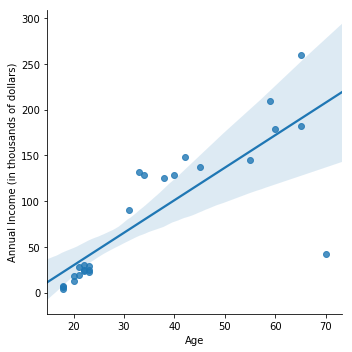

In [522]:
sns.lmplot(x='Age', y='Annual Income (in thousands of dollars)', data=ProfessionScoreData)
plt.show()

Although these plots look the same (other than the size of the figure), regplot() and lmplot() actually have a few differences which one should keep in mind. Firstly, while the x and y variables can come in various data types including numpy arrays, pandas Series objects, or variables in a pandas dataframe (specified in the 'data' parameter) when using the regplot() function, the lmplot() function requires the 'data' parameter with x and y variables as strings.

Since lmplot() is more extensive in its features, we will continue working with it further in this tutorial.

Moving on, we must point out the effect of outliers. While fitting a regression model, outliers can often greatly alter the regression model. In order to combat this issue, regplot() and lmplot() offer a 'robust' parameter, when set to True, uses a loss function that gives little weightage to the large residual values imposed by outliers.

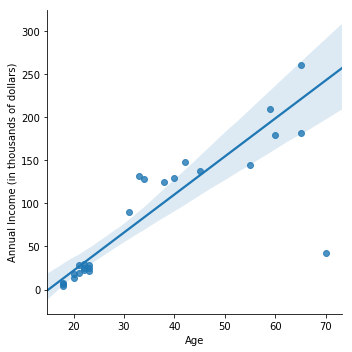

In [523]:
#robust = True works for both regplot and lmplot
sns.lmplot(x='Age', y='Annual Income (in thousands of dollars)', data=ProfessionScoreData, robust = True)
plt.show()

We now move to our last new dataset, Trajectory Data. This data was collected by a Physics student as a ball was launched in the air. The height measurements from the ground were recorded.

Let's begin by loading the data.

In [524]:
#load the data
TrajectoryData = pd.read_csv('Trajectory.csv')
TrajectoryData.head()

,Position (x),Height (y)
0,0,0.2
1,1,8.7
2,2,16.4
3,3,20.7
4,4,22.8


Assuming that the student did not know that the ball's height would form a parabolic curve, the student proceed to plotting the data in order to analyze it further. He started by fitting a standard linear regression model on the data. 

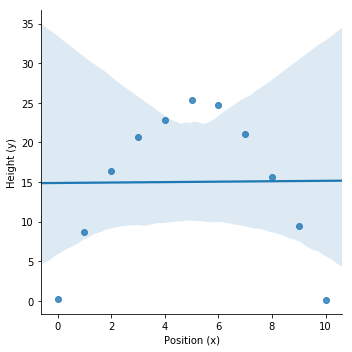

In [525]:
sns.lmplot(x='Position (x)', y='Height (y)', data=TrajectoryData)
plt.show()

Clearly, the regression line does not seem to fit the data and the size of the confidence interval is also quite expansive. This indicates that perhaps the height vs. position data shows some other relationship that is non-linear.

The student next alters the function call to include a parameter (order) and and sets it equal to 2 to analyze whether there may be a quadratic relationship between the two veriables.

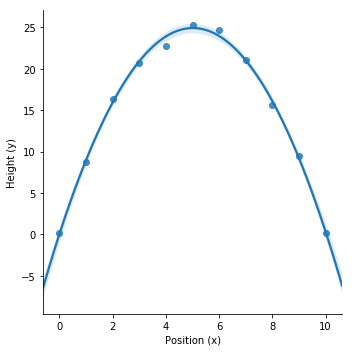

In [526]:
sns.lmplot(x='Position (x)', y='Height (y)', data=TrajectoryData, order = 2)
plt.show()

The regression line fits much more smoothly to the data points, suggesting a quadratic relationship between height of the ball and its horizontal position!

To further confirm which regressional line is a better choice, we can use residual plots using Seaborn's residplot() function. These plots show the residuals for each sample of data. For an optimally fitting regression, the residuals should randomly scatter on either side of y=0.

Now we plot the residual plots for order=1 and order=2. We see that the residual plot for order=2 displays nearly randomly scattered points around y=0.

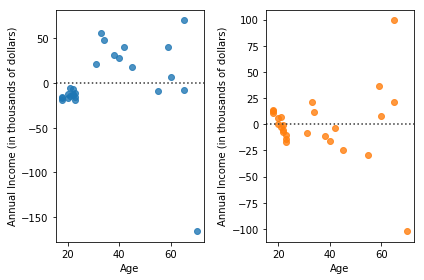

In [527]:
#generate a figure of subplots (1 row by 2 columns) to allow visualization of the two plots side by side
fig, ax = plt.subplots(1, 2)

#plotting two residual plots using the residplot() function
sns.residplot(x="Age", y='Annual Income (in thousands of dollars)', data=ProfessionScoreData, order = 1, ax = ax[0])
sns.residplot(x="Age", y='Annual Income (in thousands of dollars)', data=ProfessionScoreData, order = 2, ax = ax[1])

#enhance formatting to ensure two plots do not overlap
fig.tight_layout()

plt.show()

The lmplot() function also accepts a 'col' parameter which allows spearate regression models with the data separated on that variable.

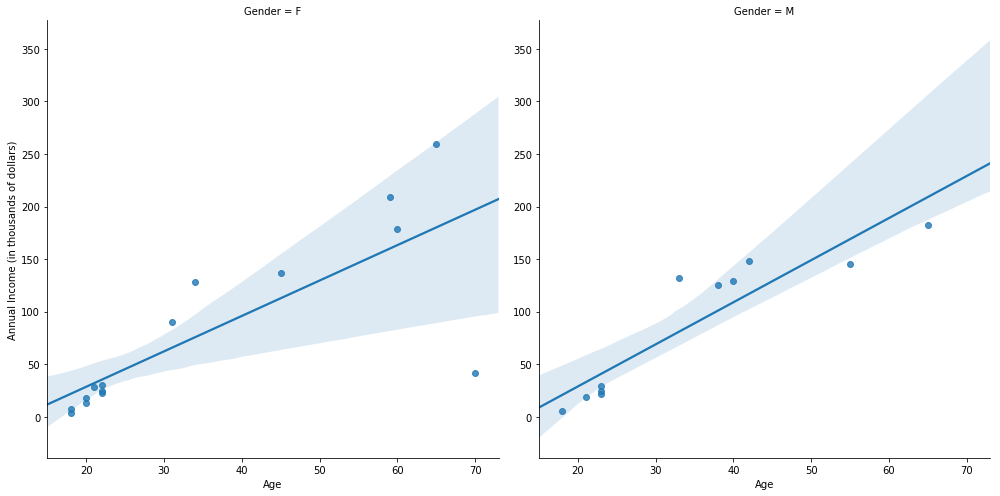

In [528]:
#col parameter of Gender separates the regression models into Female (shown on the left) and Male (shown on the right)
sns.lmplot(x='Age', y='Annual Income (in thousands of dollars)', col='Gender', data=ProfessionScoreData, size = 7)
plt.show()

Lastly, a regression model can be plotted in association with more complex plots. Below, we see a jointplot with an integrated regression line specified by the kind='reg' parameter.

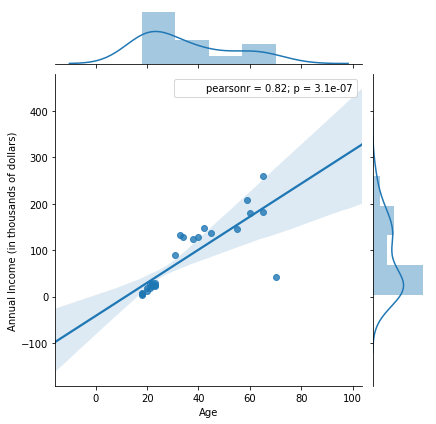

In [529]:
sns.jointplot(x='Age', y='Annual Income (in thousands of dollars)', data=ProfessionScoreData, kind='reg')
plt.show()

Before we leave this section, it is important we learn some size and shape formatting techniques for the plots too. Below detailed are the ways to resize plots for regplot() or lmplot().

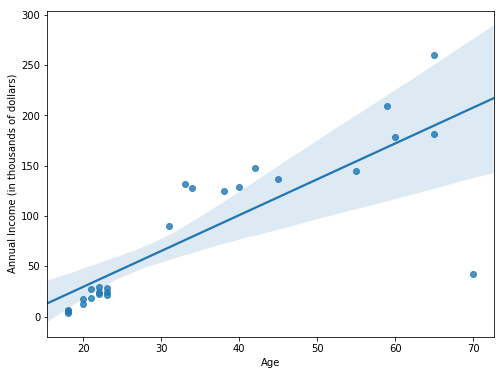

In [530]:
#before the regplot() function, plt.figure can be used to specify the figsize dimensions
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Annual Income (in thousands of dollars)', data=ProfessionScoreData)
plt.show()

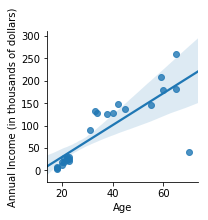

In [531]:
#the size parameter can be used within the lmplot() function
sns.lmplot(x='Age', y='Annual Income (in thousands of dollars)', data=ProfessionScoreData, size = 3)
plt.show()

## Heatmaps

Another great feature of Seaborn is that it allows for easy generation of heatmaps, matrices which use color to show the relationships between two variables.

Let's consider a dataset of the average temperature in Central Park over the past 210 years for every month. By plotting a heatmap, we can observe trends in the temperature over the months of the year, over the years.

Here, we load the data:

In [532]:
#load the data
CentralParkTemperatureData = pd.read_csv('CentralParkTemperature.csv')
CentralParkTemperatureData.head()

,Year,Month,Temperature (in deg F)
0,1900,1,31.8
1,1910,1,31.1
2,1920,1,23.4
3,1930,1,33.3
4,1940,1,25.0


Now, we can create a Seaborn heatmap, using the pivot() function to specify row, column, and data points names.

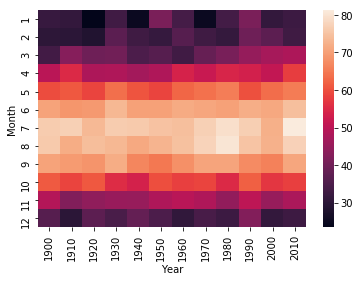

In [533]:
#plot heatmap of Central Park Temperature over the months and years
CPTemperature = (CentralParkTemperatureData.pivot("Month", "Year", "Temperature (in deg F)"))
ax = sns.heatmap(CPTemperature)
plt.show()

## Color Palettes

Color is an essential component of data visualization that can greatly help or hinder the perception of notable relationships depending on how effectively it is used.

Seaborn offers a great choice of color palettes and also allows the user to customize color palettes:

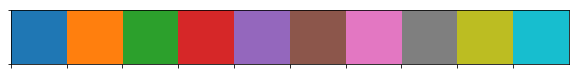

In [534]:
#show the current color palette
current_palette = sns.color_palette()
sns.palplot(current_palette)
plt.show()

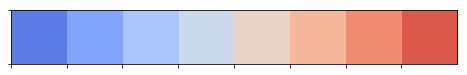

In [535]:
#coolwarm color palette with 8 colors
sns.palplot(sns.color_palette("coolwarm", 8))
plt.show()

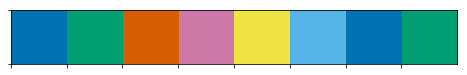

In [536]:
#colorblind color palette with 8 colors
sns.palplot(sns.color_palette("colorblind", 8))
plt.show()

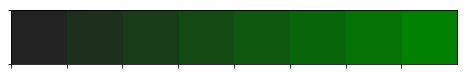

In [537]:
#dark color palette of 8 greens
sns.palplot(sns.dark_palette("green", 8))
plt.show()

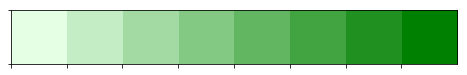

In [538]:
#light color palette of 8 greens
sns.palplot(sns.light_palette("green", 8))
plt.show()

Now, let's discover how to use the color palettes on plots we have generated previously. Here are two ways to color the countplot:

1. use 'with' keyword to introduce color palette
2. use the 'palette' parameter within the countplot() function

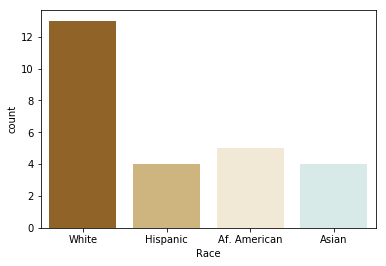

In [539]:
#use 'with' keyword to introduce color palette
with sns.color_palette("BrBG"):
    sns.countplot(x="Race", data=ProfessionScoreData)
    plt.show()

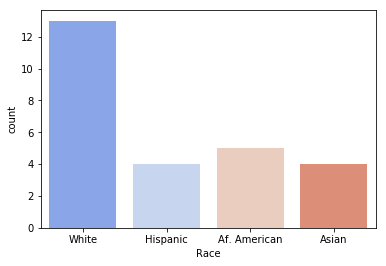

In [540]:
#use the 'palette' parameter within the countplot() function
sns.countplot(x="Race", data=ProfessionScoreData, palette = "coolwarm")
plt.show()

The boxplot() function has a similar 'palette' parameter to specify color.

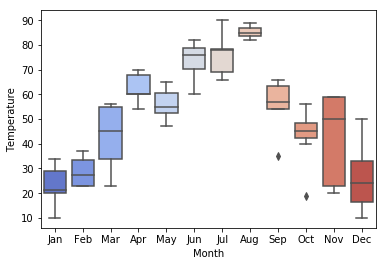

In [541]:
sns.boxplot(x = "Month", y="Temperature", data = DayTemperatureData, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], palette = "coolwarm")
plt.show()

If no built-in color palette fits your taste, you can create a cutomized palette by specifying the rgb values, and an n value indicating the number of colors.

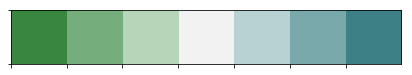

In [542]:
#customized color palette
sns.palplot(sns.diverging_palette(130, 200, n=7))
plt.show()

We can now color our countplot and boxplots using the customized color palette!

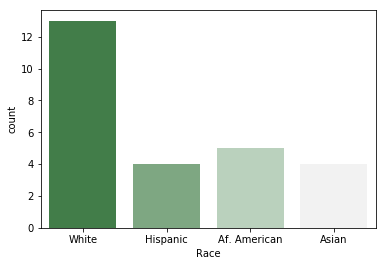

In [543]:
#countplot with custom color palette
with sns.diverging_palette(130, 200, n=7):
    sns.countplot(x="Race", data=ProfessionScoreData)
    plt.show()

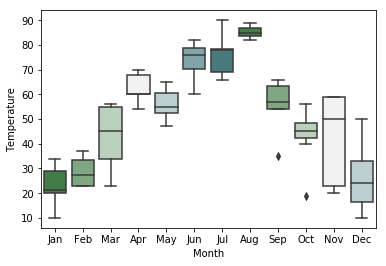

In [544]:
#boxplot with custome color palette
BlueToGreen = sns.diverging_palette(130, 200, n=7)
sns.boxplot(x = "Month", y="Temperature", data = DayTemperatureData, order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], palette = BlueToGreen)
plt.show()

## References and Futher Resources

This tutorial has touched upon the many features of the Seaborn library and its importance in data visualization, before and after processing. For further guidance with the Seaborn library, the following links may be useful:
1. [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)
2. [Visualization with Seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html)
3. [Seaborn Color Palettes](https://chrisalbon.com/python/data_visualization/seaborn_color_palettes/)